<a href="https://colab.research.google.com/github/Nanthu2207/Dominos---Predictive-Purchase-Order-System/blob/main/Predictive_Purchase_Order_System_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dominos - Predictive Purchase Order System**






# Data cleaning and preprocessing

In [ ]:
#Required library
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
pd.options.display.float_format = '{:.2f}'.format
from pmdarima import auto_arima


In [ ]:
df=pd.read_csv('/content/Pizza_Sale - pizza_sales.csv')
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [ ]:
df.shape

(48620, 12)

In [ ]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48613.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821494
std,14035.529381,6180.119770,0.143077,3.621789,4.437520
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [ ]:
#null values count
df.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,16
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,7
pizza_size,0
pizza_category,23


In [ ]:
#last five rows in dataframe
df.tail()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [ ]:
#show the null values in pizza_name_id
df[df['pizza_name_id'].isnull()]

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
36,37,15,NaN,1,1/1/2015,13:33:00,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
37,38,15,NaN,1,1/1/2015,13:33:00,20.75,20.75,L,Supreme,"Soppressata Salami, Fontina Cheese, Mozzarella...",The Soppressata Pizza
38,39,15,NaN,1,1/1/2015,13:33:00,12.00,12.00,S,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza
39,40,16,NaN,1,1/1/2015,13:34:07,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
40,41,16,NaN,1,1/1/2015,13:34:07,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
41,42,16,NaN,1,1/1/2015,13:34:07,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
309,310,131,NaN,1,2/1/2015,21:33:10,12.00,12.00,S,Veggie,"Spinach, Mushrooms, Tomatoes, Green Olives, Fe...",The Green Garden Pizza
310,311,131,NaN,1,2/1/2015,21:33:10,12.50,12.50,S,Supreme,"Spinach, Red Onions, Pepperoni, Tomatoes, Arti...",The Spinach Supreme Pizza
311,312,132,NaN,1,2/1/2015,21:42:45,9.75,9.75,S,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza
312,313,133,NaN,1,2/1/2015,22:00:17,20.75,20.75,L,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


**Handling Missing Values Pizza Sales Data**

In [ ]:
#pizza name_id_mapping
name_id_mapping = df[['pizza_name', 'pizza_name_id']].dropna().drop_duplicates()
name_id_mapping = name_id_mapping.set_index('pizza_name')['pizza_name_id'].to_dict()

df['pizza_name_id'] = df['pizza_name_id'].fillna(df['pizza_name'].map(name_id_mapping))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [ ]:
#show the null values in pizza_name

df[df['pizza_name'].isnull()]

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
688,689,303,pepperoni_s,1,5/1/2015,20:02:51,9.75,9.75,S,Classic,"Mozzarella Cheese, Pepperoni",NaN
689,690,304,hawaiian_s,1,5/1/2015,20:07:58,10.50,10.50,S,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",NaN
690,691,304,mexicana_l,1,5/1/2015,20:07:58,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",NaN
691,692,305,pepperoni_l,1,5/1/2015,20:35:40,15.25,15.25,L,Classic,"Mozzarella Cheese, Pepperoni",NaN
692,693,305,sicilian_s,1,5/1/2015,20:35:40,12.25,12.25,S,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",NaN
693,694,305,spicy_ital_m,1,5/1/2015,20:35:40,16.50,16.50,M,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",NaN
694,695,306,big_meat_s,1,5/1/2015,20:37:40,12.00,12.00,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",NaN


In [ ]:
#pizza_name_mapping
pizza_name_mapping = df[['pizza_name_id', 'pizza_name']].dropna().drop_duplicates()
pizza_name_mapping = pizza_name_mapping.set_index('pizza_name_id')['pizza_name'].to_dict()

df['pizza_name'] = df['pizza_name'].fillna(df['pizza_name_id'].map(pizza_name_mapping))

In [ ]:
#show the null values in total_price

df[df['total_price'].isnull()]

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
781,782,341,bbq_ckn_m,1,6/1/2015,15:35:47,16.75,NaN,M,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
782,783,341,pepperoni_s,1,6/1/2015,15:35:47,9.75,NaN,S,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza
783,784,342,sicilian_l,1,6/1/2015,15:44:12,20.25,NaN,L,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza
784,785,342,southw_ckn_l,1,6/1/2015,15:44:12,20.75,NaN,L,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",The Southwest Chicken Pizza
785,786,343,five_cheese_l,1,6/1/2015,15:45:37,18.50,NaN,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
786,787,343,four_cheese_m,1,6/1/2015,15:45:37,14.75,NaN,M,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
787,788,344,ital_cpcllo_m,1,6/1/2015,16:01:11,16.00,NaN,M,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",The Italian Capocollo Pizza


In [ ]:
df['total_price'].fillna(df['quantity']*df['unit_price'],inplace=True)

In [ ]:
#show the null values in pizza_category
df[df['pizza_category'].isnull()]

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
426,427,181,mexicana_l,1,3/1/2015,18:49:32,20.25,20.25,L,NaN,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
427,428,182,brie_carre_s,1,3/1/2015,18:50:10,23.65,23.65,S,NaN,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",The Brie Carre Pizza
428,429,182,peppr_salami_l,1,3/1/2015,18:50:10,20.75,20.75,L,NaN,"Genoa Salami, Capocollo, Pepperoni, Tomatoes, ...",The Pepper Salami Pizza
429,430,183,napolitana_m,1,3/1/2015,18:54:55,16.00,16.00,M,NaN,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
430,431,183,spin_pesto_l,1,3/1/2015,18:54:55,20.75,20.75,L,NaN,"Spinach, Artichokes, Tomatoes, Sun-dried Tomat...",The Spinach Pesto Pizza
431,432,183,spin_pesto_s,1,3/1/2015,18:54:55,12.50,12.50,S,NaN,"Spinach, Artichokes, Tomatoes, Sun-dried Tomat...",The Spinach Pesto Pizza
432,433,184,hawaiian_l,1,3/1/2015,18:59:05,16.50,16.50,L,NaN,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
433,434,185,sicilian_m,1,3/1/2015,19:08:33,16.25,16.25,M,NaN,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza
434,435,185,spin_pesto_s,1,3/1/2015,19:08:33,12.50,12.50,S,NaN,"Spinach, Artichokes, Tomatoes, Sun-dried Tomat...",The Spinach Pesto Pizza
435,436,186,mexicana_l,1,3/1/2015,19:36:00,20.25,20.25,L,NaN,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [ ]:
#pizza_category_mapping
pizza_category_mapping = df[['pizza_name', 'pizza_category']].dropna().drop_duplicates()
pizza_category_mapping = pizza_category_mapping.set_index('pizza_name')['pizza_category'].to_dict()

df['pizza_category'] = df['pizza_category'].fillna(df['pizza_name'].map(pizza_category_mapping))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [ ]:
#show the null values in pizza_ingredients
df[df['pizza_ingredients'].isnull()]

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
580,581,254,five_cheese_l,1,4/1/2015,22:22:13,18.50,18.50,L,Veggie,NaN,The Five Cheese Pizza
581,582,255,five_cheese_l,1,5/1/2015,11:23:35,18.50,18.50,L,Veggie,NaN,The Five Cheese Pizza
582,583,255,green_garden_m,1,5/1/2015,11:23:35,16.00,16.00,M,Veggie,NaN,The Green Garden Pizza
583,584,255,hawaiian_l,1,5/1/2015,11:23:35,16.50,16.50,L,Classic,NaN,The Hawaiian Pizza
584,585,255,spinach_fet_m,1,5/1/2015,11:23:35,16.00,16.00,M,Veggie,NaN,The Spinach and Feta Pizza
585,586,256,pep_msh_pep_l,1,5/1/2015,11:56:06,17.50,17.50,L,Classic,NaN,"The Pepperoni, Mushroom, and Peppers Pizza"
586,587,257,cali_ckn_l,1,5/1/2015,11:59:04,20.75,20.75,L,Chicken,NaN,The California Chicken Pizza
630,631,277,four_cheese_m,1,5/1/2015,15:41:50,14.75,14.75,M,Veggie,NaN,The Four Cheese Pizza
631,632,278,ital_veggie_m,1,5/1/2015,15:49:21,16.75,16.75,M,Veggie,NaN,The Italian Vegetables Pizza
632,633,278,southw_ckn_l,1,5/1/2015,15:49:21,20.75,20.75,L,Chicken,NaN,The Southwest Chicken Pizza


In [ ]:
#pizza_ingredients_mapping
pizza_ingredients_mapping = df[['pizza_name', 'pizza_ingredients']].dropna().drop_duplicates()
pizza_ingredients_mapping = pizza_ingredients_mapping.set_index('pizza_name')['pizza_ingredients'].to_dict()

df['pizza_ingredients'] = df['pizza_ingredients'].fillna(df['pizza_name'].map(pizza_ingredients_mapping))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [ ]:
#show the null values
df.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [ ]:
#check the duplicate values
df[df.duplicated(keep=False)]

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name


**Handling Missing Values in Pizza Ingredients data**

In [ ]:
ingradients_df=pd.read_csv('/content/Pizza_ingredients - Pizza_ingredients.csv')
ingradients_df.head()

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0


In [ ]:
ingradients_df.shape

(518, 4)

In [ ]:
ingradients_df.describe()

,Items_Qty_In_Grams
count,514.000000
mean,30.564202
std,30.351623
min,5.000000
25%,10.000000
50%,20.000000
75%,40.000000
max,200.000000


In [ ]:
ingradients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  514 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB


In [ ]:
ingradients_df.isnull().sum()

,0
pizza_name_id,0
pizza_name,0
pizza_ingredients,0
Items_Qty_In_Grams,4


In [ ]:
#show the null values in Items_Qty_In_Grams
ingradients_df[ingradients_df['Items_Qty_In_Grams'].isnull()]

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
24,brie_carre_s,The Brie Carre Pizza,Caramelized Onions,NaN
149,hawaiian_l,The Hawaiian Pizza,Sliced Ham,NaN
152,hawaiian_m,The Hawaiian Pizza,Sliced Ham,NaN
155,hawaiian_s,The Hawaiian Pizza,Sliced Ham,NaN


In [ ]:
filtered_data= ingradients_df[ingradients_df['pizza_name_id']=='brie_carre_s']
filtered_data

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
22,brie_carre_s,The Brie Carre Pizza,Brie Carre Cheese,30.0
23,brie_carre_s,The Brie Carre Pizza,Prosciutto,30.0
24,brie_carre_s,The Brie Carre Pizza,Caramelized Onions,NaN
25,brie_carre_s,The Brie Carre Pizza,Pears,10.0
26,brie_carre_s,The Brie Carre Pizza,Thyme,5.0
27,brie_carre_s,The Brie Carre Pizza,Garlic,5.0


In [ ]:
filtered_data= ingradients_df[ingradients_df['pizza_name_id']=='hawaiian_l']
filtered_data

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
149,hawaiian_l,The Hawaiian Pizza,Sliced Ham,NaN
150,hawaiian_l,The Hawaiian Pizza,Pineapple,45.0
151,hawaiian_l,The Hawaiian Pizza,Mozzarella Cheese,30.0


In [ ]:
filtered_data= ingradients_df[ingradients_df['pizza_name_id']=='hawaiian_m']
filtered_data

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
152,hawaiian_m,The Hawaiian Pizza,Sliced Ham,NaN
153,hawaiian_m,The Hawaiian Pizza,Pineapple,30.0
154,hawaiian_m,The Hawaiian Pizza,Mozzarella Cheese,20.0


In [ ]:
filtered_data= ingradients_df[ingradients_df['pizza_name_id']=='hawaiian_s']
filtered_data

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
155,hawaiian_s,The Hawaiian Pizza,Sliced Ham,NaN
156,hawaiian_s,The Hawaiian Pizza,Pineapple,15.0
157,hawaiian_s,The Hawaiian Pizza,Mozzarella Cheese,10.0


In [ ]:
mean_qty=ingradients_df.groupby('pizza_name_id')['Items_Qty_In_Grams'].mean()

In [ ]:
print(mean_qty)

pizza_name_id
bbq_ckn_l        30.000000
bbq_ckn_m        20.833333
bbq_ckn_s        13.333333
big_meat_s       65.000000
brie_carre_s     16.000000
                   ...    
the_greek_xl     61.666667
the_greek_xxl    80.000000
veggie_veg_l     34.375000
veggie_veg_m     23.125000
veggie_veg_s     13.125000
Name: Items_Qty_In_Grams, Length: 91, dtype: float64


In [ ]:
ingradients_df['Items_Qty_In_Grams'] = ingradients_df['Items_Qty_In_Grams'].fillna(ingradients_df['pizza_name_id'].map(mean_qty))

In [ ]:
ingradients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  518 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB


In [ ]:
#total ingredients
count_ingredients=len(ingradients_df['pizza_ingredients'].unique())
print(count_ingredients)

64


In [ ]:
#finding duplicate values
ingradients_df[ingradients_df.duplicated(keep=False)]

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams


**Merge two tables**

In [ ]:
merge_data= pd.merge(df,ingradients_df, how="left", on="pizza_name_id")


In [ ]:
merge_data

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients_x,pizza_name_x,pizza_name_y,pizza_ingredients_y,Items_Qty_In_Grams
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,The Hawaiian Pizza,Sliced Ham,25.0
1,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,The Hawaiian Pizza,Pineapple,30.0
2,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,The Hawaiian Pizza,Mozzarella Cheese,20.0
3,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,The Classic Deluxe Pizza,Pepperoni,40.0
4,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,The Classic Deluxe Pizza,Mushrooms,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267571,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,The Barbecue Chicken Pizza,Red Peppers,5.0
267572,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,The Barbecue Chicken Pizza,Green Peppers,20.0
267573,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,The Barbecue Chicken Pizza,Tomatoes,10.0
267574,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,The Barbecue Chicken Pizza,Red Onions,20.0


In [ ]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267576 entries, 0 to 267575
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   pizza_id             267576 non-null  int64  
 1   order_id             267576 non-null  int64  
 2   pizza_name_id        267576 non-null  object 
 3   quantity             267576 non-null  int64  
 4   order_date           267576 non-null  object 
 5   order_time           267576 non-null  object 
 6   unit_price           267576 non-null  float64
 7   total_price          267576 non-null  float64
 8   pizza_size           267576 non-null  object 
 9   pizza_category       267576 non-null  object 
 10  pizza_ingredients_x  267576 non-null  object 
 11  pizza_name_x         267576 non-null  object 
 12  pizza_name_y         267576 non-null  object 
 13  pizza_ingredients_y  267576 non-null  object 
 14  Items_Qty_In_Grams   267576 non-null  float64
dtypes: float64(3), in

In [ ]:
merge_data[['pizza_name_x','pizza_name_y']]

,pizza_name_x,pizza_name_y
0,The Hawaiian Pizza,The Hawaiian Pizza
1,The Hawaiian Pizza,The Hawaiian Pizza
2,The Hawaiian Pizza,The Hawaiian Pizza
3,The Classic Deluxe Pizza,The Classic Deluxe Pizza
4,The Classic Deluxe Pizza,The Classic Deluxe Pizza
...,...,...
267571,The Barbecue Chicken Pizza,The Barbecue Chicken Pizza
267572,The Barbecue Chicken Pizza,The Barbecue Chicken Pizza
267573,The Barbecue Chicken Pizza,The Barbecue Chicken Pizza
267574,The Barbecue Chicken Pizza,The Barbecue Chicken Pizza


In [ ]:
merge_data[['pizza_ingredients_x','pizza_ingredients_y']]

,pizza_ingredients_x,pizza_ingredients_y
0,"Sliced Ham, Pineapple, Mozzarella Cheese",Sliced Ham
1,"Sliced Ham, Pineapple, Mozzarella Cheese",Pineapple
2,"Sliced Ham, Pineapple, Mozzarella Cheese",Mozzarella Cheese
3,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",Pepperoni
4,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",Mushrooms
...,...,...
267571,"Barbecued Chicken, Red Peppers, Green Peppers,...",Red Peppers
267572,"Barbecued Chicken, Red Peppers, Green Peppers,...",Green Peppers
267573,"Barbecued Chicken, Red Peppers, Green Peppers,...",Tomatoes
267574,"Barbecued Chicken, Red Peppers, Green Peppers,...",Red Onions


In [ ]:
#drop the columns
merge_data.drop(columns=['pizza_name_y','pizza_ingredients_y'],inplace=True)
#rename the columns
merge_data.rename(columns={'pizza_name_x':'pizza_name','pizza_ingredients_x':'pizza_ingredients'},inplace=True)



In [ ]:
#total columns
merge_data.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name',
       'Items_Qty_In_Grams'],
      dtype='object')

In [ ]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267576 entries, 0 to 267575
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   pizza_id            267576 non-null  int64  
 1   order_id            267576 non-null  int64  
 2   pizza_name_id       267576 non-null  object 
 3   quantity            267576 non-null  int64  
 4   order_date          267576 non-null  object 
 5   order_time          267576 non-null  object 
 6   unit_price          267576 non-null  float64
 7   total_price         267576 non-null  float64
 8   pizza_size          267576 non-null  object 
 9   pizza_category      267576 non-null  object 
 10  pizza_ingredients   267576 non-null  object 
 11  pizza_name          267576 non-null  object 
 12  Items_Qty_In_Grams  267576 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 26.5+ MB


In [ ]:
#duplicate rows in merge data
merge_data[merge_data.duplicated(keep=False)]

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Items_Qty_In_Grams
3,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,40.0
4,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,40.0
5,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,40.0
8,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,30.0
9,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267570,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,20.0
267571,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,5.0
267572,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,20.0
267574,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,20.0


In [ ]:
#drop duplicate rows in merge data

merge_data.drop_duplicates(inplace=True)

In [ ]:
#converting dtype
def parse_dates(date):
    for fmt in ("%d-%m-%Y", "%d/%m/%Y", "%Y-%m-%d"):  # Add more if needed
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            continue
    return pd.NaT  # If all fail
merge_data['order_date'] = merge_data['order_date'].apply(parse_dates)

In [ ]:

merge_data[merge_data['order_date'].isnull()]


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Items_Qty_In_Grams


In [ ]:
#today date
import datetime as dt
today=dt.date.today()
today

datetime.date(2025, 5, 7)

In [ ]:
#check the future dates
merge_data[merge_data['order_date'].dt.date > today]

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Items_Qty_In_Grams


# **Feature Engineering**









In [ ]:
merge_data['year']=merge_data['order_date'].dt.year
merge_data['Month']=merge_data['order_date'].dt.month
merge_data['Day']=merge_data['order_date'].dt.day

merge_data['day_of_week']=merge_data['order_date'].dt.isocalendar().week


In [ ]:
merge_data

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Items_Qty_In_Grams,year,Month,Day,day_of_week
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,25.0,2015,1,1,1
1,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,30.0,2015,1,1,1
2,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,20.0,2015,1,1,1
3,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,40.0,2015,1,1,1
6,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,10.0,2015,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267565,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,60.0,2015,12,31,53
267567,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,100.0,2015,12,31,53
267570,48620,21350,bbq_ckn_s,1,2015-12-31,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,20.0,2015,12,31,53
267571,48620,21350,bbq_ckn_s,1,2015-12-31,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,5.0,2015,12,31,53


In [ ]:
#reset the index
merge_data.reset_index(inplace = True, drop = True)

In [ ]:
merge_data

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Items_Qty_In_Grams,year,Month,Day,day_of_week
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,25.0,2015,1,1,1
1,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,30.0,2015,1,1,1
2,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,20.0,2015,1,1,1
3,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,40.0,2015,1,1,1
4,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,10.0,2015,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187367,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,60.0,2015,12,31,53
187368,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,100.0,2015,12,31,53
187369,48620,21350,bbq_ckn_s,1,2015-12-31,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,20.0,2015,12,31,53
187370,48620,21350,bbq_ckn_s,1,2015-12-31,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,5.0,2015,12,31,53


In [ ]:
!pip install holidays
import holidays

In [ ]:
us_holidays=holidays.US()
# Creating a 'holiday' column
merge_data['holiday'] = merge_data['order_date'].apply(lambda x: 1 if x in us_holidays else 0)

merge_data[['order_date','holiday']].head()

,order_date,holiday
0,2015-01-01,1
1,2015-01-01,1
2,2015-01-01,1
3,2015-01-01,1
4,2015-01-01,1


In [ ]:
merge_data[['order_date','holiday']].tail()

,order_date,holiday
187367,2015-12-31,0
187368,2015-12-31,0
187369,2015-12-31,0
187370,2015-12-31,0
187371,2015-12-31,0


In [ ]:
merge_data['Promotion'] = merge_data['order_date'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

merge_data[['order_date','Promotion']].head()

,order_date,Promotion
0,2015-01-01,0
1,2015-01-01,0
2,2015-01-01,0
3,2015-01-01,0
4,2015-01-01,0


In [ ]:
#pizza count of daily sales
daily_sales = merge_data.groupby('order_date')['quantity'].sum()
daily_sales

,quantity
order_date,
2015-01-01,620
2015-01-02,631
2015-01-03,618
2015-01-04,414
2015-01-05,482
...,...
2015-12-27,347
2015-12-28,381
2015-12-29,302


In [ ]:
# Filter data for week 7
week_7_sales = merge_data[merge_data['day_of_week']==7]  # Days 0 to 6 (Monday to Sunday)

# Group by pizza name and sum the quantity sold
week_7_pizza_sales = week_7_sales.groupby('pizza_name')['quantity'].sum().reset_index()

# Sort by highest sales
week_7_pizza_sales = week_7_pizza_sales.sort_values('quantity', ascending=False)

# Display week 7 pizza sales
print("\n🍕 Pizza Sales Count for Week 7:")
print(week_7_pizza_sales)



🍕 Pizza Sales Count for Week 7:
                                    pizza_name  quantity
0                   The Barbecue Chicken Pizza       252
9                        The Four Cheese Pizza       214
4                 The California Chicken Pizza       212
23                          The Sicilian Pizza       212
25                 The Southwest Chicken Pizza       205
31           The Vegetables + Vegetables Pizza       160
26                     The Spicy Italian Pizza       159
30                      The Thai Chicken Pizza       156
10                             The Greek Pizza       155
14                   The Italian Supreme Pizza       144
17                          The Mexicana Pizza       140
12                          The Hawaiian Pizza       135
7                     The Classic Deluxe Pizza       117
18                        The Napolitana Pizza       112
20                         The Pepperoni Pizza       110
13                 The Italian Capocollo Pizza       10

# **Exploratory Data Analysis (EDA):**

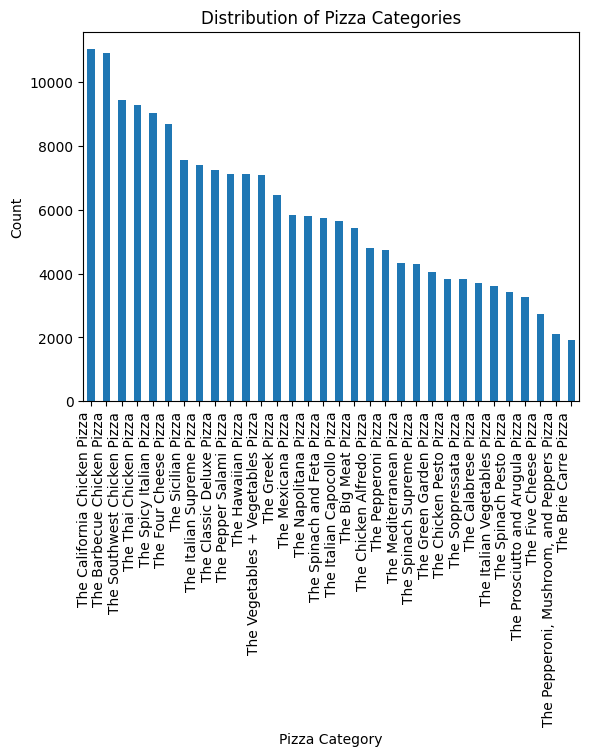

In [ ]:
ax=merge_data['pizza_name'].value_counts().plot.bar(rot=0)
plt.ylabel('Count')
plt.xlabel('Pizza Category')
plt.xticks(rotation=90, ha='right')
plt.title('Distribution of Pizza Categories')
plt.show()

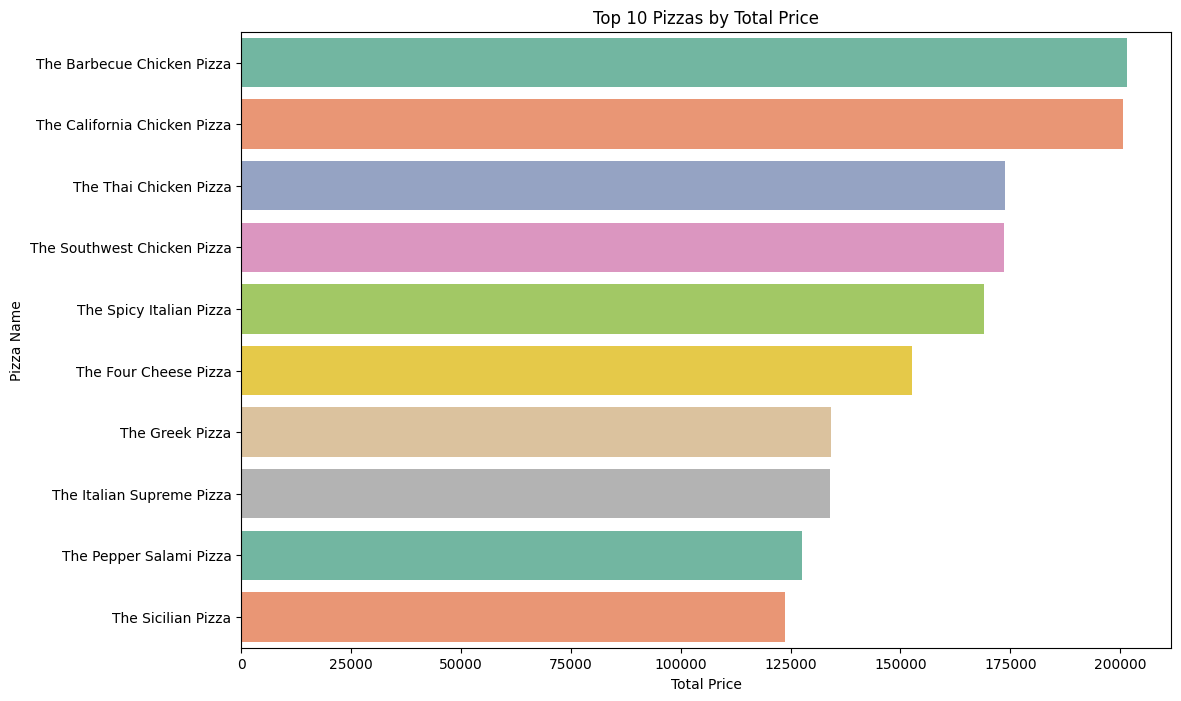

In [ ]:
# Sort data to get top 10 pizzas by total_price
top_10_pizzas = merge_data.groupby('pizza_name')['total_price'].sum().reset_index()
top_10_pizzas = top_10_pizzas.sort_values(by='total_price', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='total_price', y='pizza_name', data=top_10_pizzas, palette='Set2')
plt.title('Top 10 Pizzas by Total Price')
plt.xlabel('Total Price')
plt.ylabel('Pizza Name')
plt.show()


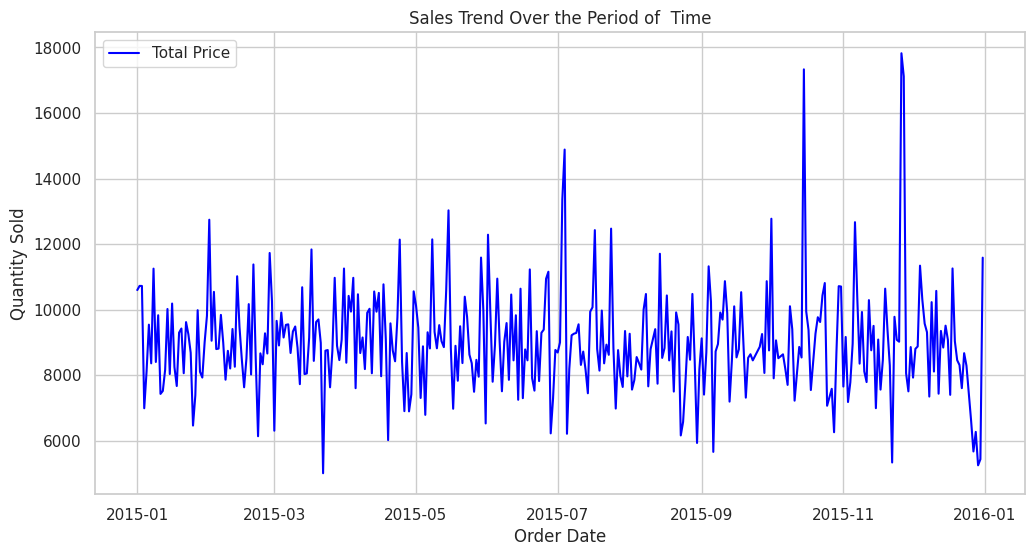

In [ ]:
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

plt.figure(figsize=(12, 6))  # Setting the figure size
# To plot the total quantity of pizzas sold each day, you need to aggregate the data first.
daily_sales = merge_data.groupby('order_date')['total_price'].sum().reset_index()
# Now you can plot 'daily_sales' against 'order_date'
sns.lineplot(data=daily_sales, x='order_date', y='total_price', label='Total Price', color='blue')

# Adding labels and title
plt.xlabel('Order Date')
plt.ylabel('Quantity Sold') # Changed y-axis label to reflect the data being plotted
plt.title('Sales Trend Over the Period of  Time') # Changed title to be more descriptive

plt.show()

Text(0.5, 1.0, 'Total Quantity Ordered per Month')

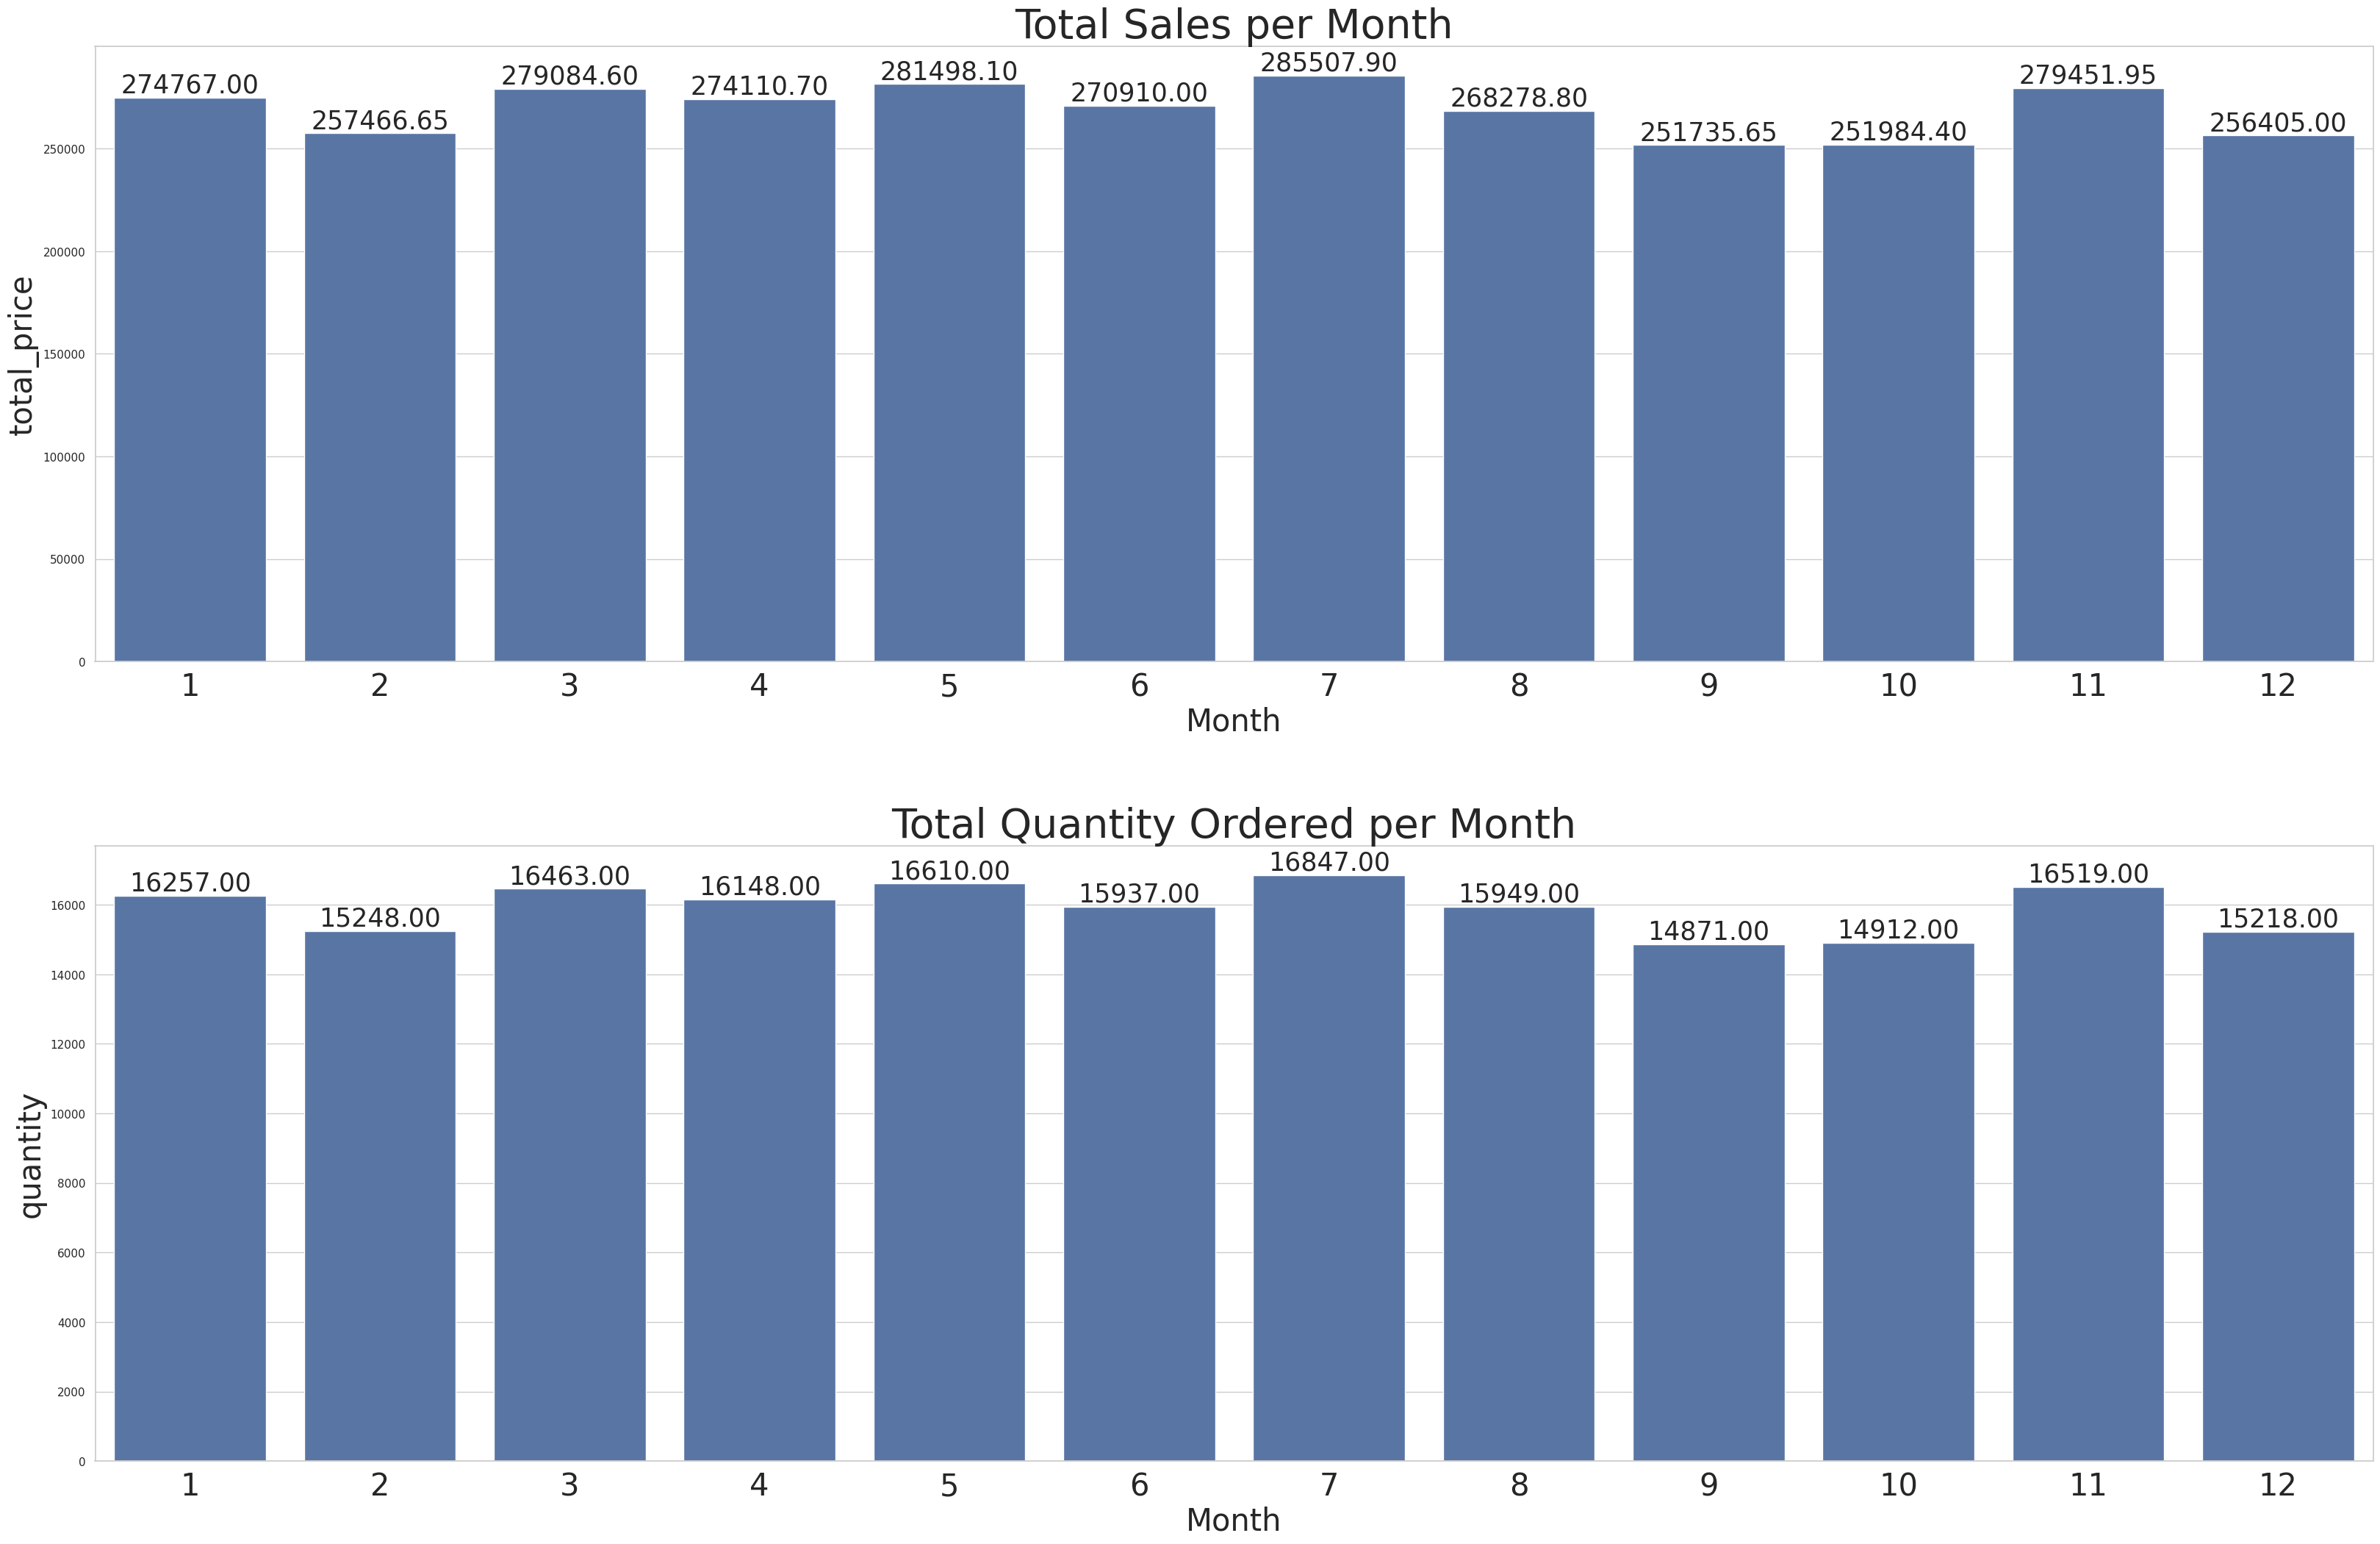

In [ ]:
# data used in this section
temp_data = merge_data.groupby(['Month'])[['total_price','quantity']].sum().reset_index()

#
fig, axes = plt.subplots(2, 1, figsize = (40,25))
fig.subplots_adjust(hspace=.3)

sns.barplot(x='Month', y='total_price', data=temp_data, ax=axes[0])
axes[0].set_xlabel(axes[0].get_xlabel(), size=30)
axes[0].set_ylabel(axes[0].get_ylabel(), size=30)
axes[0].set_xticklabels(axes[0].get_xticklabels(), size=30)
axes[0].bar_label(axes[0].containers[0], fmt='%.2f', size=25)
axes[0].set_title('Total Sales per Month', size= 40)

# -------

#
sns.barplot(x='Month', y='quantity', data=temp_data, ax=axes[1])
axes[1].set_xlabel(axes[1].get_xlabel(), size=30)
axes[1].set_ylabel(axes[1].get_ylabel(), size=30)
axes[1].set_xticklabels(axes[1].get_xticklabels(), size=30)
axes[1].bar_label(axes[1].containers[0], fmt='%.2f', size=25)
axes[1].set_title('Total Quantity Ordered per Month', size= 40)

In [ ]:
!pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 86.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=fdd8f0fd60f32b857bb1e15aade728a2d46de349b846f48852e1912f1455d2a0
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
# For ydata_profiling (latest)
from ydata_profiling import ProfileReport

# If you're using older pandas-profiling (pre-2023)
# from pandas_profiling import ProfileReport


In [ ]:
profile = ProfileReport(merge_data)
profile

<Axes: xlabel='pizza_category', ylabel='count'>

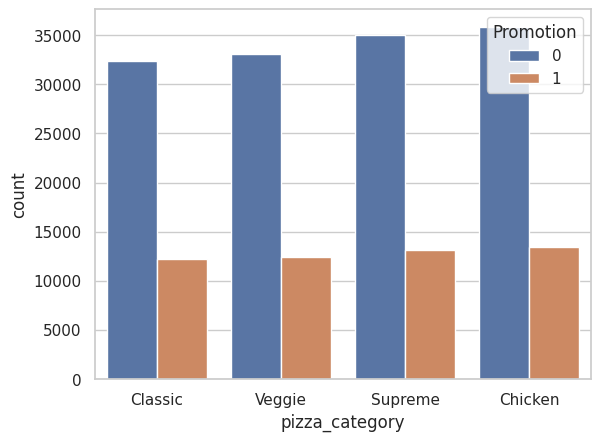

In [ ]:
sns.countplot(merge_data, x="pizza_category",hue="Promotion")

<Axes: xlabel='Day', ylabel='quantity'>

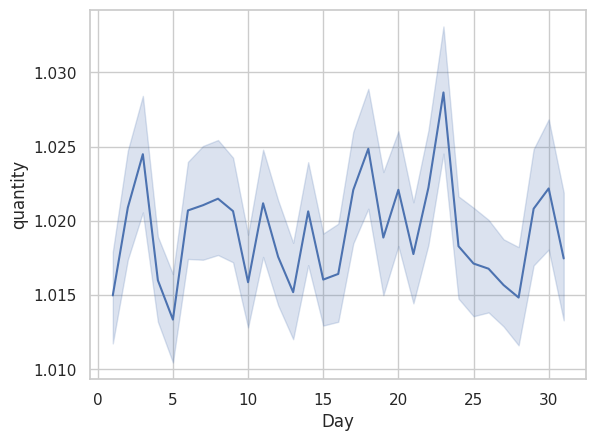

In [ ]:
sns.lineplot(data=merge_data, x="Day", y="quantity")

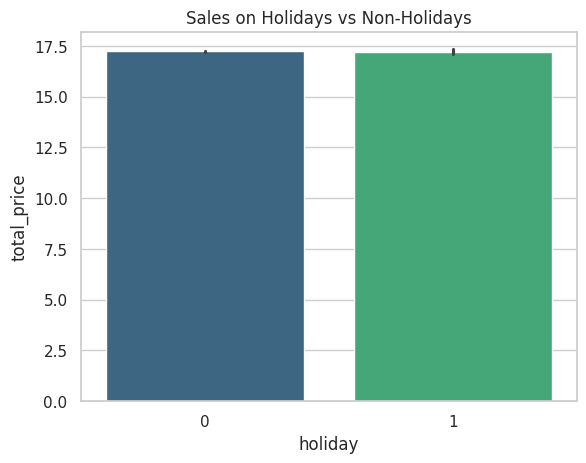

In [ ]:
sns.barplot(x='holiday', y='total_price', data=merge_data, palette='viridis')
plt.title('Sales on Holidays vs Non-Holidays')
plt.show()


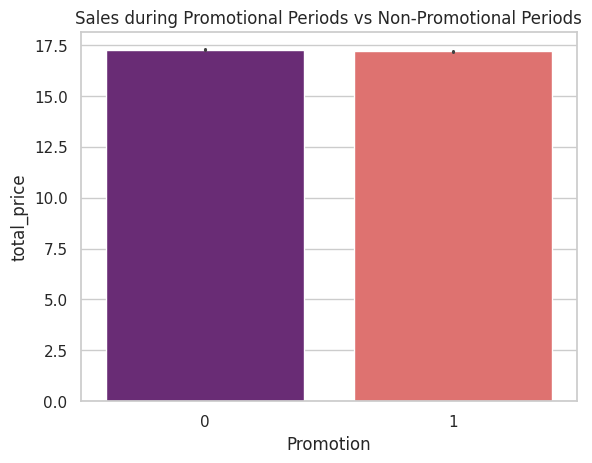

In [ ]:
sns.barplot(x='Promotion', y='total_price', data=merge_data, palette='magma')
plt.title('Sales during Promotional Periods vs Non-Promotional Periods')
plt.show()

<Axes: >

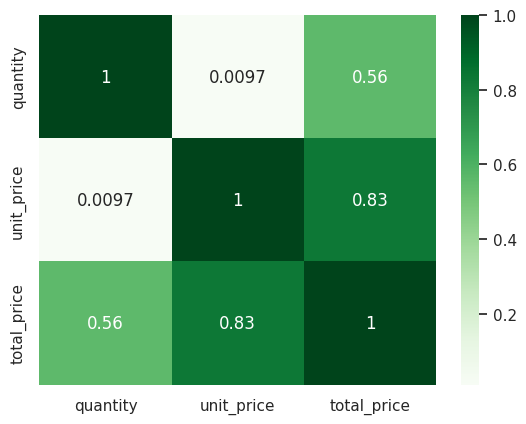

In [ ]:

matrix = merge_data[['quantity', 'unit_price', 'total_price']].corr()

# plotting correlation matrix
sns.heatmap(matrix, cmap="Greens", annot=True)

# **Model Selection**

**ARIMA model**

AR (p) : Auto Regressive
I (d) : Integrated
MA (q) : Moving Average
(p,d,q) is known as the order of the ARIMA model. Values of these parameters are based on the above mentioned models.

p : Number of auto regressive terms.

d : Number of differencing orders required to make the time series stationary.

q : Number of lagged forecast errors in the prediction equation.


ARIMA MODEL


In [ ]:


# Assuming 'merge_data' has 'order_date' and 'quantity'
merge_data['order_date'] = pd.to_datetime(merge_data['order_date'])

# Group by week
weekly_sales = merge_data.groupby(merge_data['order_date'].dt.to_period('W'))['quantity'].sum()
weekly_sales.index = weekly_sales.index.to_timestamp()  # convert PeriodIndex to Timestamp
weekly_sales = weekly_sales.sort_index()
weekly_sales = weekly_sales.astype(float)

In [ ]:

def Mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.8)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    forecast_series = pd.Series(forecast, index=test.index)
    mape = Mape(test, forecast)
    return mape

# grid search
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mape = evaluate_arima_model(dataset, order)
                    if mape < best_score:
                        best_score, best_cfg = mape, order
                    # print('ARIMA%s MAPE=%.3f' % (order, mape))
                except:
                    continue
    print('Best ARIMA%s MAPE=%.3f' % (best_cfg, best_score))


p_values = [0, 1, 2, 3, 4, 5,6]
d_values = range(0, 2)
q_values = range(0, 6)

warnings.filterwarnings("ignore")
evaluate_models(weekly_sales, p_values, d_values, q_values)



Best ARIMA(2, 0, 2) MAPE=18.937


In [ ]:
model = ARIMA(train ,order=(2,0,2))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

# Print forecast series
forecast_series = pd.Series(forecast, index=test.index)
print(forecast_series)

order_date
2015-10-19    3353.883411
2015-10-26    3549.778904
2015-11-02    3677.800937
2015-11-09    3707.785329
2015-11-16    3678.680202
2015-11-23    3639.087322
2015-11-30    3615.968935
2015-12-07    3612.409428
2015-12-14    3619.348276
2015-12-21    3627.208943
2015-12-28    3631.288434
Freq: W-MON, Name: predicted_mean, dtype: float64


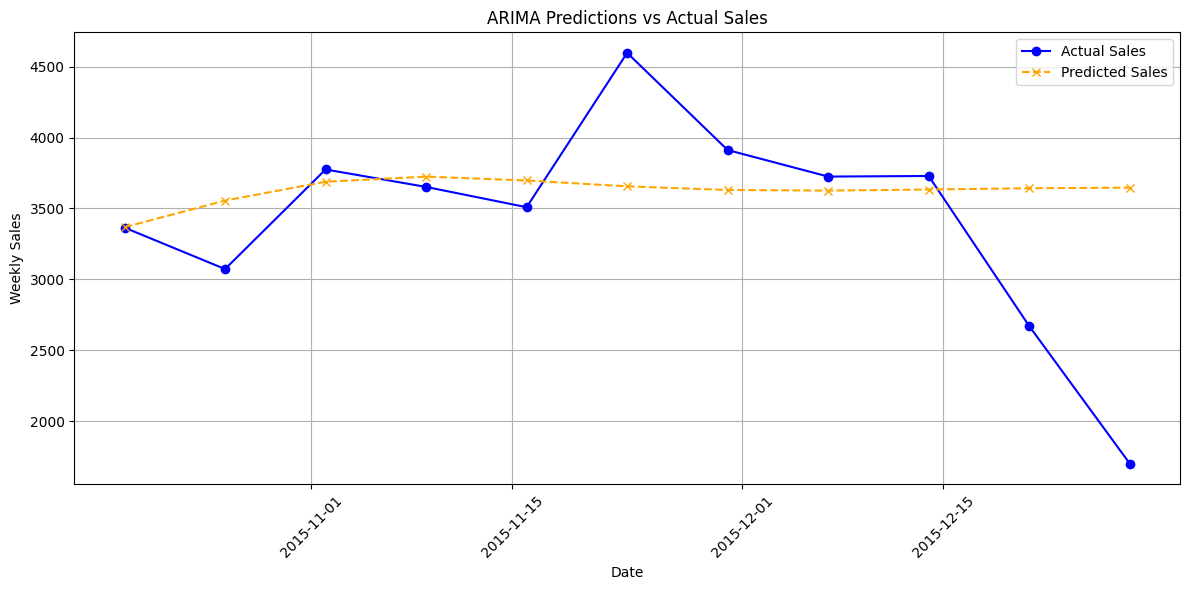

In [ ]:
#plot the data
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Actual Sales', color='blue', marker='o')
plt.plot(forecast_series.index, forecast_series, label='Predicted Sales', color='orange', linestyle='--', marker='x')
plt.title('ARIMA Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

**SARIMAX MODEL**

SARIMA (Seasonal AutoRegressive Integrated Moving Average) is a statistical model used for forecasting time series data that exhibits both trends and seasonal patterns.

SARIMA(p, d, q)(P, D, Q, s)

p, d, q: Non-seasonal autoregressive, differencing, and moving average terms

P, D, Q: Seasonal autoregressive, differencing, and moving average terms

s: The number of time steps in a season (e.g., 7 for weekly seasonality)

In [ ]:
#train test split
train_size = int(len(weekly_sales) * 0.8)
train, test = weekly_sales[0:train_size], weekly_sales[train_size:]

def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100


# Best SARIMA Model Training and Output
def best_sarima_model(train, test):
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)).fit(disp=False)
    predictions = model.forecast(steps=len(test))
    sarima_mape = mape(test, predictions)

    print(f"Best SARIMA Model MAPE: {sarima_mape:.4f}")
    return predictions, sarima_mape

# Train and evaluate the SARIMA model
sarima_predictions, sarima_mape_score = best_sarima_model(train, test)

# Formating the predictions for display
sarima_predictions = pd.Series(sarima_predictions, index=test.index)

print("Predictions:")
print(sarima_predictions)


Best SARIMA Model MAPE: 18.5162
Predictions:
order_date
2015-10-19    3252.912749
2015-10-26    3654.798018
2015-11-02    3409.909216
2015-11-09    2762.325723
2015-11-16    3593.959036
2015-11-23    3094.805425
2015-11-30    3332.069211
2015-12-07    3164.347555
2015-12-14    3486.289698
2015-12-21    3274.217102
2015-12-28    2609.419873
Freq: W-MON, Name: predicted_mean, dtype: float64


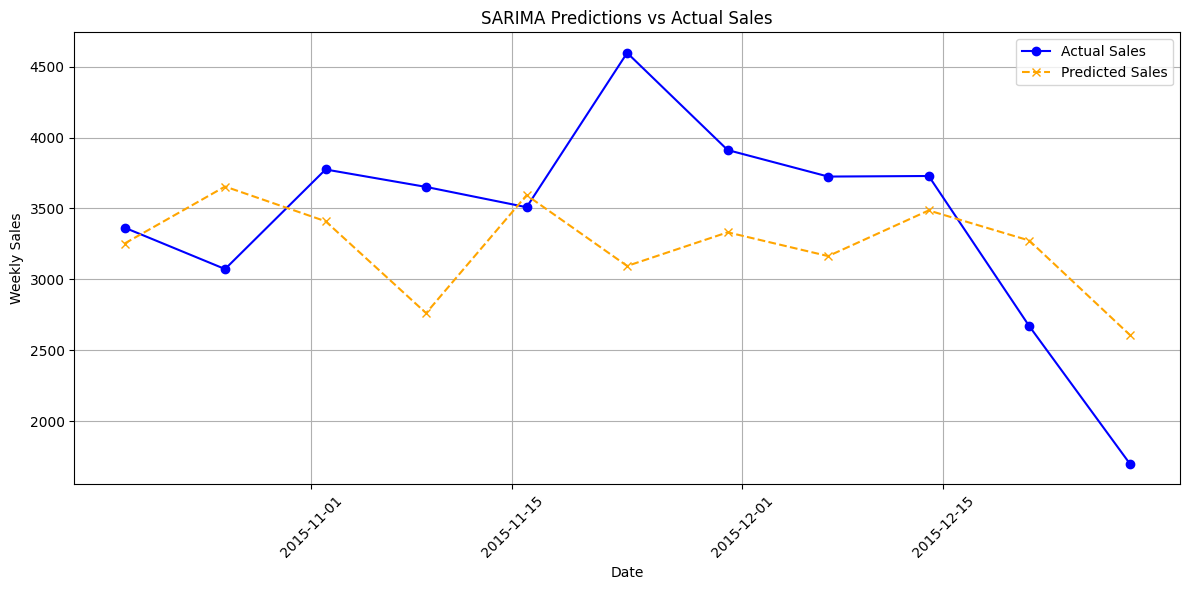

In [ ]:
#plot the data
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Actual Sales', color='blue', marker='o')
plt.plot(sarima_predictions.index, sarima_predictions, label='Predicted Sales', color='orange', linestyle='--', marker='x')
plt.title('SARIMA Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

LSTM


LSTM stands for long short term memory. It is a model or architecture that extends the memory of recurrent neural networks.

In [ ]:
#train test split
train_size = int(len(weekly_sales) * 0.8)
train, test = weekly_sales[0:train_size], weekly_sales[train_size:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
MAPE: 0.2119


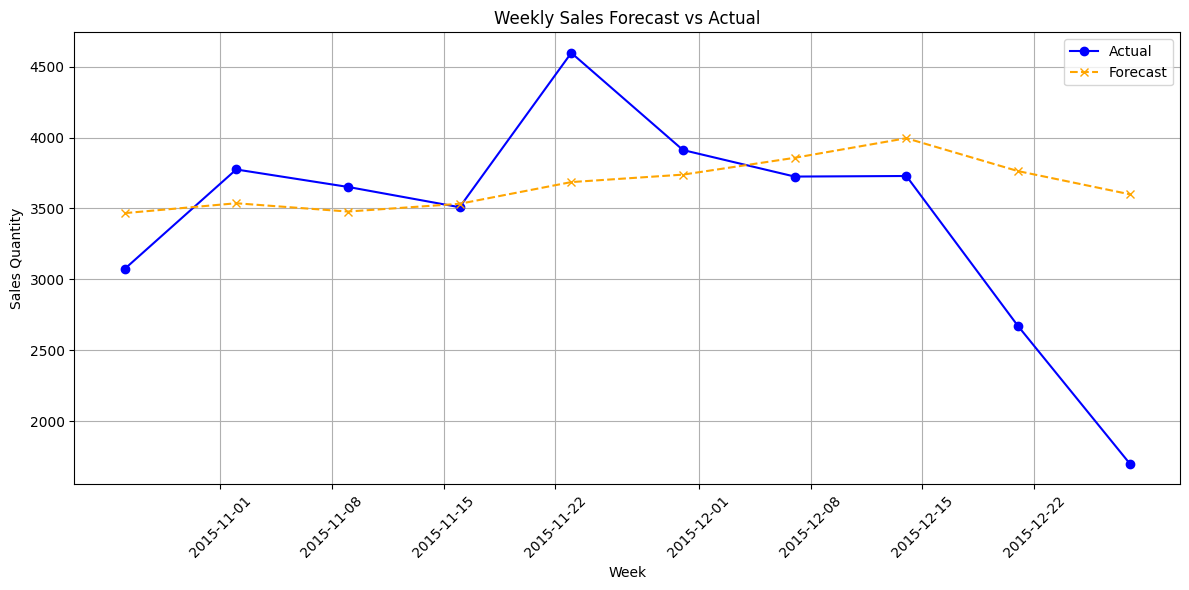

In [ ]:

# Prepare weekly sales
def prepare_weekly_sales(df):
    df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
    df = df.dropna(subset=['order_date'])
    weekly = df.groupby(df['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum().reset_index()
    weekly.columns = ['week_start', 'quantity']
    return weekly.sort_values('week_start')

# Prepare data for LSTM
def create_sequences(data, time_steps):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data[['quantity']])
    X, y = [], []
    for i in range(time_steps, len(scaled)):
        X.append(scaled[i-time_steps:i])
        y.append(scaled[i])
    X, y = np.array(X), np.array(y)
    split = int(len(X) * 0.8)
    return X[:split], y[:split], X[split:], y[split:], scaler, data['week_start'][time_steps+split:]

# Train model and forecast
def forecast_lstm(X_train, y_train, X_test, y_test, scaler, dates):
    model = Sequential([LSTM(50, input_shape=(X_train.shape[1], 1)), Dense(1)])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    preds = scaler.inverse_transform(model.predict(X_test))
    actuals = scaler.inverse_transform(y_test)
    print(f"MAPE: {mape(actuals, preds):.4f}")
    return pd.Series(preds.flatten(), index=dates[:len(preds)]), actuals

# Run everything
weekly_sales = prepare_weekly_sales(merge_data)
X_train, y_train, X_test, y_test, scaler, test_dates = create_sequences(weekly_sales, time_steps=3)
forecast, actuals = forecast_lstm(X_train, y_train, X_test, y_test, scaler, test_dates)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(test_dates[:len(actuals)], actuals, label='Actual',color='blue', marker='o')
plt.plot(forecast.index, forecast.values, label='Forecast', marker='x',color='orange', linestyle='--')
plt.xlabel('Week')
plt.ylabel('Sales Quantity')
plt.title('Weekly Sales Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
forecast_series

,predicted_mean
order_date,
2015-10-19,3368.227764
2015-10-26,3555.690662
2015-11-02,3688.488488
2015-11-09,3724.672932
2015-11-16,3697.397480
2015-11-23,3656.025581
2015-11-30,3630.607839
2015-12-07,3626.177396
2015-12-14,3633.678601


**Prophet**

Prophet is an open-source time series forecasting library developed by Facebook (Meta).It is based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data.

**Model:** Additive model – y(t) = trend + seasonality + holidays + error

In [ ]:

# === STEP 1: Clean and Prepare Weekly Sales Data ===
def prepare_weekly_sales(merge_data):
    merge_data['order_date'] = pd.to_datetime(merge_data['order_date'], errors='coerce')
    merge_data = merge_data.dropna(subset=['order_date'])
    weekly_sales = merge_data.groupby(merge_data['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum().reset_index()
    weekly_sales = weekly_sales.rename(columns={'order_date': 'week_start'})
    weekly_sales = weekly_sales.sort_values('week_start').reset_index(drop=True)
    return weekly_sales

# Convert from merge_data
weekly_sales= prepare_weekly_sales(merge_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnvg6r3i3/9mh18__k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnvg6r3i3/oyhljrht.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38372', 'data', 'file=/tmp/tmpnvg6r3i3/9mh18__k.json', 'init=/tmp/tmpnvg6r3i3/oyhljrht.json', 'output', 'file=/tmp/tmpnvg6r3i3/prophet_model0uy7hwun/prophet_model-20250425093344.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:33:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:33:45 - cmdstanpy - INFO - Chai

Prophet MAPE on test data: 0.1963


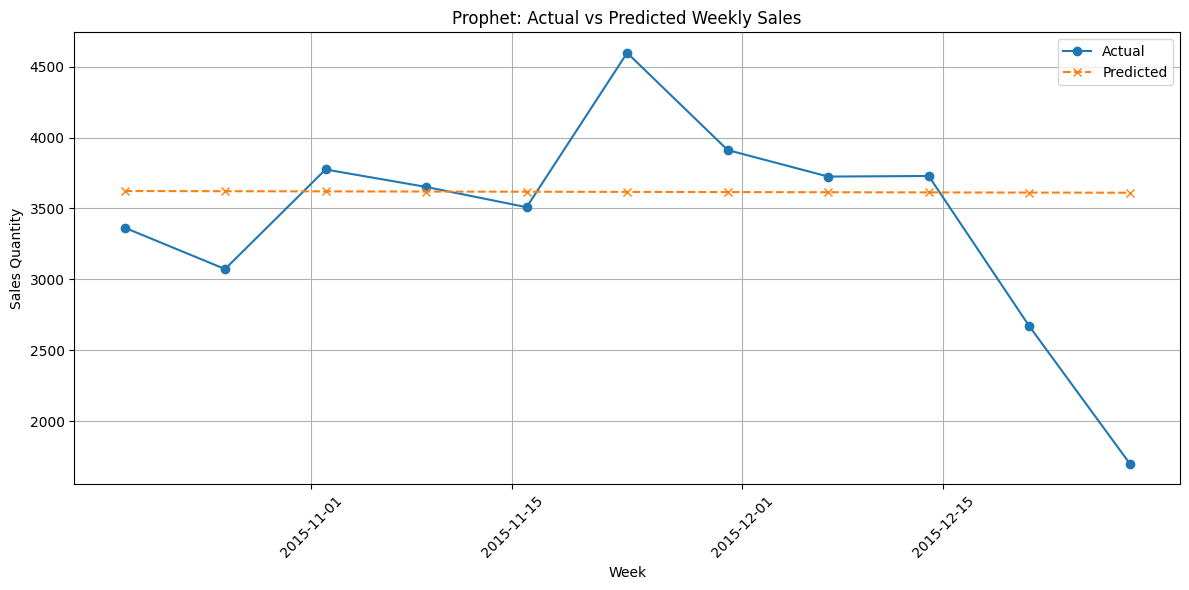

In [ ]:


# === Prepare data for Prophet ===
prophet_df = pizza_sales_weekly.rename(columns={'week_start': 'ds', 'quantity': 'y'})

# Train-test split (e.g., 80-20)
split = int(len(prophet_df) * 0.8)
train_df = prophet_df[:split]
test_df = prophet_df[split:].reset_index(drop=True)

# Train Prophet model
model = Prophet()
model.fit(train_df)

# Predict on test period (not future)
future = test_df[['ds']]  # Only use the dates from test set
forecast = model.predict(future)

# Extract predicted values
test_df['Prophet_Predictions'] = forecast['yhat']

# === Evaluate with MAPE ===
prophet_mape = mape(test_df['y'], test_df['Prophet_Predictions'])
print(f"Prophet MAPE on test data: {prophet_mape:.4f}")

# === Optional: Plot Actual vs Predicted ===
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(test_df['ds'], test_df['y'], label='Actual', marker='o')
plt.plot(test_df['ds'], test_df['Prophet_Predictions'], label='Predicted', marker='x', linestyle='--')
plt.title('Prophet: Actual vs Predicted Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Sales Quantity')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
test_df['Prophet_Predictions']

,Prophet_Predictions
0,3622.887259
1,3621.699249
2,3620.511238
3,3619.323228
4,3618.135217
5,3616.947207
6,3615.759196
7,3614.571185
8,3613.383175
9,3612.195164


 **Regression model**

[3491.65468461 3475.89342641 3543.34457802 3527.58331982 3511.82206162
 3496.06080341 3480.29954521 3547.75069682 3531.98943862 3516.22818041
 3500.46692221]
Linear Regression MAPE: 18.99%


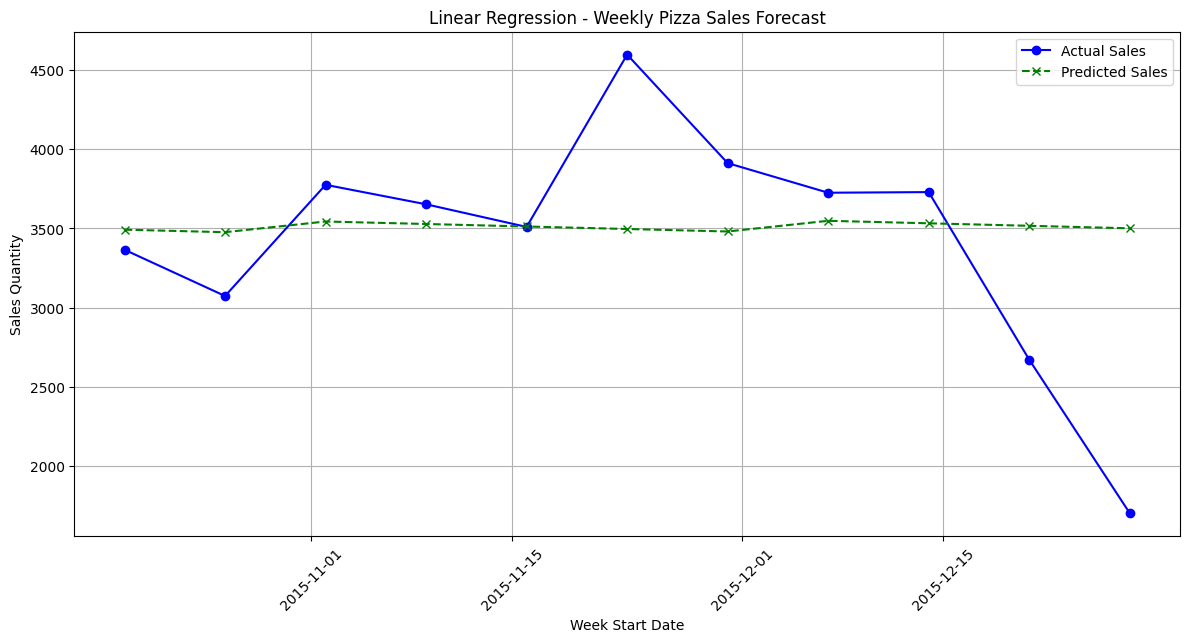

In [ ]:

# === Convert week_start to datetime ===
weekly_sales['week_start'] = pd.to_datetime(weekly_sales['week_start'])

# === Feature Engineering ===
weekly_sales['weekofyear'] = weekly_sales['week_start'].dt.isocalendar().week
weekly_sales['month'] = weekly_sales['week_start'].dt.month
weekly_sales['quarter'] = weekly_sales['week_start'].dt.quarter
weekly_sales['year'] = weekly_sales['week_start'].dt.year
weekly_sales['week_num'] = range(len(weekly_sales))  # Sequential index as feature

# === Train-Test Split (80-20) ===
train_size = int(len(weekly_sales) * 0.8)
train, test = weekly_sales[0:train_size], weekly_sales[train_size:]

# === Define Features (X) and Target (y) ===
X_train = train[['weekofyear', 'month', 'quarter', 'year', 'week_num']]
y_train = train['quantity']
X_test = test[['weekofyear', 'month', 'quarter', 'year', 'week_num']]
y_test = test['quantity']

# === Train Linear Regression Model ===
model = LinearRegression()
model.fit(X_train, y_train)

# === Predict ===
y_pred = model.predict(X_test)
print(y_pred)
# === Evaluate Model ===
mape_score = mean_absolute_percentage_error(y_test, y_pred)
print(f"Linear Regression MAPE: {mape_score * 100:.2f}%")

# === Plot Actual vs Predicted ===
plt.figure(figsize=(12, 6))
plt.plot(test['week_start'], y_test, label='Actual Sales', color='blue', marker='o')
plt.plot(test['week_start'], y_pred, label='Predicted Sales', color='green', linestyle='--', marker='x')
plt.title('Linear Regression - Weekly Pizza Sales Forecast')
plt.xlabel('Week Start Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


**Predict pizza sales for the next one week**

ARIMA

In [ ]:

# Step 1: Prepare weekly sales data by pizza type
def prepare_weekly_sales_by_pizza(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    df['week'] = df['order_date'].dt.to_period('W').apply(lambda r: r.start_time)
    weekly_sales_by_pizza = df.groupby(['week', 'pizza_name_id'])['quantity'].sum().reset_index()
    weekly_sales_by_pizza.set_index('week', inplace=True)
    return weekly_sales_by_pizza

# Step 2: ARIMA forecast function for each pizza type
def forecast_sales_arima(pizza_type, train_series, periods=1):
    model = ARIMA(train_series, order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=periods)
    return pizza_type, forecast.tolist()

# Step 3: Loop over all pizza types and forecast using ARIMA
def forecast_next_week_arima(weekly_df, periods=1):
    forecasts = {}
    last_week = weekly_df.index.max()
    next_week_start = last_week + pd.Timedelta(weeks=1)
    next_week_end = next_week_start + pd.Timedelta(days=6)

    for pizza_type in weekly_df['pizza_name_id'].unique():
        df = weekly_df[weekly_df['pizza_name_id'] == pizza_type]
        train = df['quantity']
        if len(train) >= 5:
            _, forecast = forecast_sales_arima(pizza_type, train, periods)
            forecasts[pizza_type] = int(forecast[0])
    return forecasts, next_week_start, next_week_end


In [ ]:
# Run this after loading your `pizza_sales` dataset
pizza_sales_weekly_by_pizza = prepare_weekly_sales_by_pizza(merge_data)

# ARIMA Forecast
arima_forecasts, arima_start, arima_end = forecast_next_week_arima(pizza_sales_weekly_by_pizza)
print(f"\n📈 ARIMA Forecast for {arima_start.date()} to {arima_end.date()}")
for pizza, val in arima_forecasts.items():
    print(f"{pizza}: {val} pizzas")
total_arima = sum(arima_forecasts.values())
print(f"\n🧾 Total forecasted pizzas (ARIMA): {total_arima} pizzas")


📈 ARIMA Forecast for 2016-01-04 to 2016-01-10
bbq_ckn_l: 88 pizzas
bbq_ckn_m: 78 pizzas
bbq_ckn_s: 26 pizzas
big_meat_s: 102 pizzas
brie_carre_s: 36 pizzas
calabrese_m: 45 pizzas
calabrese_s: 8 pizzas
cali_ckn_l: 89 pizzas
cali_ckn_m: 85 pizzas
cali_ckn_s: 37 pizzas
ckn_alfredo_l: 14 pizzas
ckn_alfredo_m: 72 pizzas
ckn_alfredo_s: 8 pizzas
ckn_pesto_l: 32 pizzas
ckn_pesto_m: 22 pizzas
ckn_pesto_s: 24 pizzas
classic_dlx_l: 26 pizzas
classic_dlx_m: 73 pizzas
classic_dlx_s: 46 pizzas
five_cheese_l: 42 pizzas
four_cheese_l: 132 pizzas
four_cheese_m: 42 pizzas
green_garden_l: 11 pizzas
green_garden_m: 19 pizzas
green_garden_s: 36 pizzas
hawaiian_l: 59 pizzas
hawaiian_m: 23 pizzas
hawaiian_s: 51 pizzas
ital_cpcllo_l: 51 pizzas
ital_cpcllo_m: 31 pizzas
ital_cpcllo_s: 23 pizzas
ital_supr_l: 54 pizzas
ital_supr_m: 54 pizzas
ital_supr_s: 16 pizzas
ital_veggie_l: 13 pizzas
ital_veggie_m: 36 pizzas
ital_veggie_s: 16 pizzas
mediterraneo_l: 41 pizzas
mediterraneo_m: 26 pizzas
mediterraneo_s: 20 pizz

SARIMA

In [ ]:


# Step 4: SARIMA forecast function for each pizza type
def forecast_sales_sarima(pizza_type, train_series, periods=1):
    model = SARIMAX(train_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(steps=periods)
    return pizza_type, forecast.tolist()

# Step 5: Loop over all pizza types and forecast using SARIMA
def forecast_next_week_sarima(weekly_df, periods=1):
    forecasts = {}
    last_week = weekly_df.index.max()
    next_week_start = last_week + pd.Timedelta(weeks=1)
    next_week_end = next_week_start + pd.Timedelta(days=6)

    for pizza_type in weekly_df['pizza_name_id'].unique():
        df = weekly_df[weekly_df['pizza_name_id'] == pizza_type]
        train = df['quantity']
        if len(train) >= 52:  # SARIMA needs at least one full season
            _, forecast = forecast_sales_sarima(pizza_type, train, periods)
            forecasts[pizza_type] = int(forecast[0])
    return forecasts, next_week_start, next_week_end


In [ ]:
# SARIMA Forecast
sarima_forecasts, sarima_start, sarima_end = forecast_next_week_sarima(pizza_sales_weekly_by_pizza)
print(f"\n📉 SARIMA Forecast for {sarima_start.date()} to {sarima_end.date()}")
for pizza, val in sarima_forecasts.items():
    print(f"{pizza}: {val} pizzas")
# Total pizzas forecasted by SARIMA
total_sarima = sum(sarima_forecasts.values())
print(f"🧾 Total forecasted pizzas (SARIMA): {total_sarima} pizzas")



📉 SARIMA Forecast for 2016-01-04 to 2016-01-10
bbq_ckn_l: 90 pizzas
bbq_ckn_m: 89 pizzas
bbq_ckn_s: 26 pizzas
big_meat_s: 96 pizzas
brie_carre_s: 40 pizzas
calabrese_m: 51 pizzas
cali_ckn_l: 99 pizzas
cali_ckn_m: 71 pizzas
cali_ckn_s: 36 pizzas
ckn_alfredo_l: 23 pizzas
ckn_alfredo_m: 70 pizzas
ckn_pesto_l: 24 pizzas
ckn_pesto_m: 23 pizzas
ckn_pesto_s: 25 pizzas
classic_dlx_l: 27 pizzas
classic_dlx_m: 82 pizzas
classic_dlx_s: 48 pizzas
five_cheese_l: 42 pizzas
four_cheese_l: 120 pizzas
four_cheese_m: 31 pizzas
green_garden_m: 14 pizzas
green_garden_s: 30 pizzas
hawaiian_l: 67 pizzas
hawaiian_m: 29 pizzas
hawaiian_s: 51 pizzas
ital_cpcllo_l: 46 pizzas
ital_cpcllo_m: 22 pizzas
ital_cpcllo_s: 29 pizzas
ital_supr_l: 68 pizzas
ital_supr_m: 53 pizzas
ital_supr_s: 7 pizzas
ital_veggie_l: 15 pizzas
ital_veggie_m: 31 pizzas
ital_veggie_s: 20 pizzas
mediterraneo_l: 37 pizzas
mediterraneo_m: 27 pizzas
mediterraneo_s: 27 pizzas
mexicana_l: 72 pizzas
mexicana_m: 21 pizzas
napolitana_l: 42 pizzas
na

**Model Comparision**

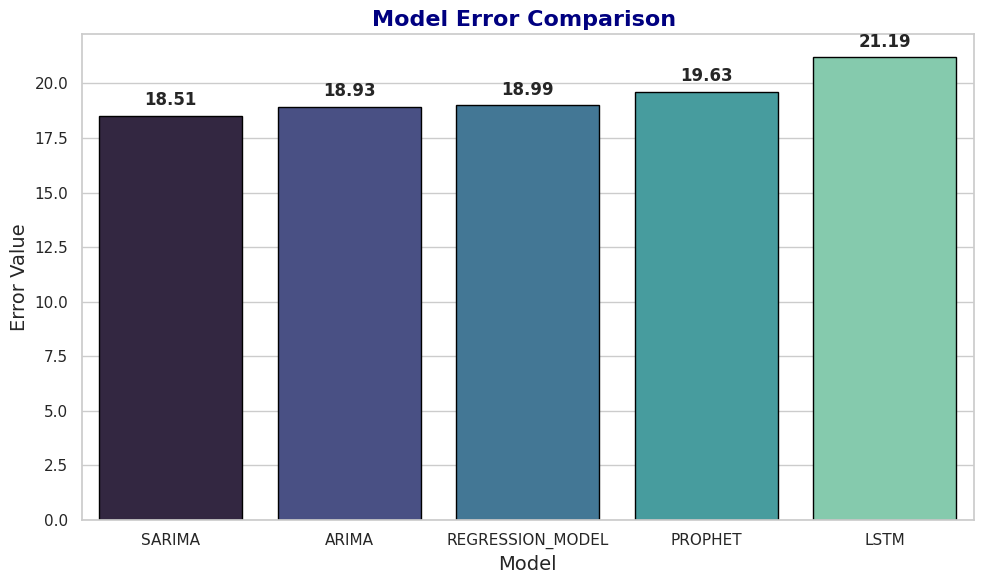

In [ ]:

# Data
MODEL = ['SARIMA', 'ARIMA', 'REGRESSION_MODEL', 'PROPHET', 'LSTM']
VALUE = [18.51, 18.93, 18.99, 19.63, 21.19]

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Create figure
plt.figure(figsize=(10,6))
barplot = sns.barplot(x=MODEL, y=VALUE, palette="mako", edgecolor='black')

# Annotate bars neatly above
for index, value in enumerate(VALUE):
    plt.text(index, value + 0.3, f'{value:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

# Titles and labels
plt.title('Model Error Comparison ', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Error Value', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


**Model Evaluation**


In [ ]:
model = sm.tsa.statespace.SARIMAX(train,order = (1,1,1),seasonal_order = (1,1,1,7))
model_fit = model.fit()
print(model_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                          quantity   No. Observations:                   42
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -249.196
Date:                           Sat, 26 Apr 2025   AIC                            508.391
Time:                                   09:14:21   BIC                            516.023
Sample:                               12-29-2014   HQIC                           510.994
                                    - 10-12-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3901      0.258     -1.514      0.130      -0.895       0.115
ma.L1         -0.4667      0.256     -1.826

In [ ]:
!pip uninstall -y numpy pmdarima
!pip install numpy==1.24.4
!pip install pmdarima --no-cache-dir


Found existing installation: numpy 2.2.5
Uninstalling numpy-2.2.5:
  Successfully uninstalled numpy-2.2.5
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 21.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.1 MB/s eta 0:00:00


In [ ]:
# Useing auto_arima to find the best parameters
auto_model = auto_arima(train['quantity'], seasonal=True, m=7, trace=True, error_action='ignore', suppress_warnings=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[7]             : AIC=511.689, Time=0.88 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=514.308, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=505.442, Time=0.61 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=505.959, Time=0.24 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=505.737, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=506.854, Time=0.71 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=507.009, Time=0.52 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=505.011, Time=0.21 sec
 ARIMA(1,1,0)(0,1,2)[7]             : AIC=507.009, Time=0.49 sec
 ARIMA(1,1,0)(1,1,2)[7]             : AIC=inf, Time=1.44 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=515.380, Time=0.36 sec
 ARIMA(2,1,0)(0,1,1)[7]             : AIC=506.879, Time=0.40 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=506.392, Time=0.52 sec
 ARIMA(2,1,1)(0,1,1)[7]             : AIC=508.027, Time=0.62 sec
 ARIMA(1,1,0)(0,1,1)[7] intercept   : AIC=505.395, 

In [ ]:
# Map predictions and calculate total ingredients
ingredients_predicted = ingradients_df.copy()
ingredients_predicted['predicted_quantity'] = ingredients_predicted['pizza_name_id'].map(arima_forecasts).fillna(0)
ingredients_predicted['total_ingredient_qty'] = ingredients_predicted['Items_Qty_In_Grams'] * ingredients_predicted['predicted_quantity']

# Sum total ingredient quantities
ingredient_totals = ingredients_predicted.groupby('pizza_ingredients')['total_ingredient_qty'].sum().to_dict()

print("🍕 Total quantity of predicted ingredients for next week:")
print(ingredient_totals)

ingredients_predicted


🍕 Total quantity of predicted ingredients for next week:
{'?duja Salami': 3220.0, 'Alfredo Sauce': 1440.0, 'Anchovies': 2965.0, 'Artichokes': 10605.0, 'Arugula': 655.0, 'Asiago Cheese': 6580.0, 'Bacon': 28020.0, 'Barbecue Sauce': 2230.0, 'Barbecued Chicken': 6380.0, 'Beef Chuck Roast': 14330.0, 'Blue Cheese': 1260.0, 'Brie Carre Cheese': 1080.0, 'Calabrese Salami': 14300.0, 'Capocollo': 61800.0, 'Caramelized Onions': 576.0, 'Chicken': 84450.0, 'Chipotle Sauce': 7240.0, 'Chorizo Sausage': 5100.0, 'Cilantro': 3620.0, 'Coarse Sicilian Salami': 10760.0, 'Corn': 24230.0, 'Eggplant': 2540.0, 'Feta Cheese': 11280.0, 'Fontina Cheese': 6040.0, 'Friggitello Peppers': 805.0, 'Garlic': 23935.0, 'Genoa Salami': 9390.0, 'Goat Cheese': 12740.0, 'Gorgonzola Piccante Cheese': 6120.0, 'Gouda Cheese': 4740.0, 'Green Olives': 4365.0, 'Green Peppers': 6225.0, 'Italian Sausage': 1020.0, 'Jalapeno Peppers': 5990.0, 'Kalamata Olives': 3650.0, 'Luganega Sausage': 5380.0, 'Mozzarella Cheese': 11430.0, 'Mushroom

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams,predicted_quantity,total_ingredient_qty
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0,88,3520.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0,88,1320.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0,88,1760.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0,88,2640.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0,88,5280.0
...,...,...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0,33,660.0
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0,33,660.0
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0,33,330.0
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0,33,495.0


In [ ]:
# predicted ingredients for next week
ingredient_totals

{'?duja Salami': 3220.0,
 'Alfredo Sauce': 1440.0,
 'Anchovies': 2965.0,
 'Artichokes': 10605.0,
 'Arugula': 655.0,
 'Asiago Cheese': 6580.0,
 'Bacon': 28020.0,
 'Barbecue Sauce': 2230.0,
 'Barbecued Chicken': 6380.0,
 'Beef Chuck Roast': 14330.0,
 'Blue Cheese': 1260.0,
 'Brie Carre Cheese': 1080.0,
 'Calabrese Salami': 14300.0,
 'Capocollo': 61800.0,
 'Caramelized Onions': 576.0,
 'Chicken': 84450.0,
 'Chipotle Sauce': 7240.0,
 'Chorizo Sausage': 5100.0,
 'Cilantro': 3620.0,
 'Coarse Sicilian Salami': 10760.0,
 'Corn': 24230.0,
 'Eggplant': 2540.0,
 'Feta Cheese': 11280.0,
 'Fontina Cheese': 6040.0,
 'Friggitello Peppers': 805.0,
 'Garlic': 23935.0,
 'Genoa Salami': 9390.0,
 'Goat Cheese': 12740.0,
 'Gorgonzola Piccante Cheese': 6120.0,
 'Gouda Cheese': 4740.0,
 'Green Olives': 4365.0,
 'Green Peppers': 6225.0,
 'Italian Sausage': 1020.0,
 'Jalapeno Peppers': 5990.0,
 'Kalamata Olives': 3650.0,
 'Luganega Sausage': 5380.0,
 'Mozzarella Cheese': 11430.0,
 'Mushrooms': 24560.0,
 'Onion